In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
X = diabetes.data
y = diabetes.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(24, input_shape=(X_train.shape[1],),activation='relu', name='input'))
model.add(Dense(20, activation='relu', name='hidden-20'))
model.add(Dense(16, activation='relu', name='hidden-16'))
model.add(Dense(12, activation='relu', name='hidden-12'))
model.add(Dense(6, activation='relu', name='hidden-6'))
model.add(Dense(3, name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 24)                264       
                                                                 
 hidden-20 (Dense)           (None, 20)                500       
                                                                 
 hidden-16 (Dense)           (None, 16)                336       
                                                                 
 hidden-12 (Dense)           (None, 12)                204       
                                                                 
 hidden-6 (Dense)            (None, 6)                 78        
                                                                 
 output (Dense)              (None, 3)                 21        
                                                                 
Total params: 1,403
Trainable params: 1,403
Non-trainabl

<AxesSubplot:>

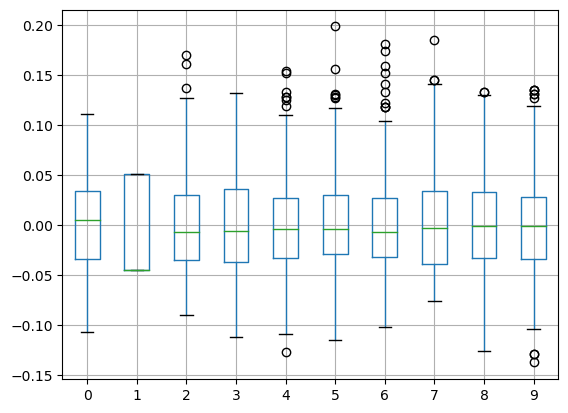

In [5]:
import pandas as pd
pd.DataFrame(X_train).boxplot() # 박스플롯을 통해 스케일링이 필요한지 확인

In [6]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
hist = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
9/9 [==============================] - 1s 24ms/step - loss: 30444.3477 - mse: 30444.3477 - mae: 155.2145 - val_loss: 27694.6191 - val_mse: 27694.6191 - val_mae: 149.5707
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 30433.7051 - mse: 30433.7051 - mae: 155.1792 - val_loss: 27682.8516 - val_mse: 27682.8516 - val_mae: 149.5308
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 30419.1777 - mse: 30419.1777 - mae: 155.1329 - val_loss: 27666.2402 - val_mse: 27666.2402 - val_mae: 149.4747
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 30398.4707 - mse: 30398.4707 - mae: 155.0657 - val_loss: 27641.4121 - val_mse: 27641.4121 - val_mae: 149.3910
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 30367.2871 - mse: 30367.2871 - mae: 154.9640 - val_loss: 27602.8770 - val_mse: 27602.8770 - val_mae: 149.2616
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 30318.6523 - mse: 30318

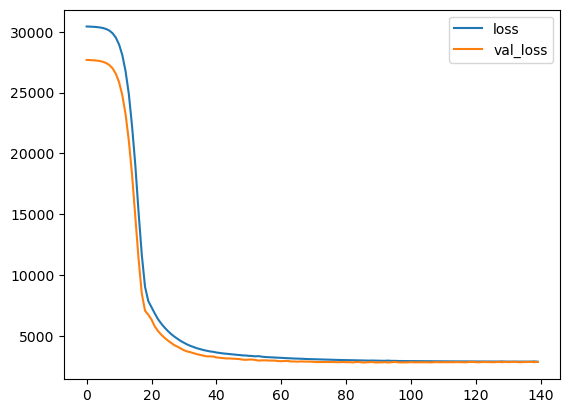

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

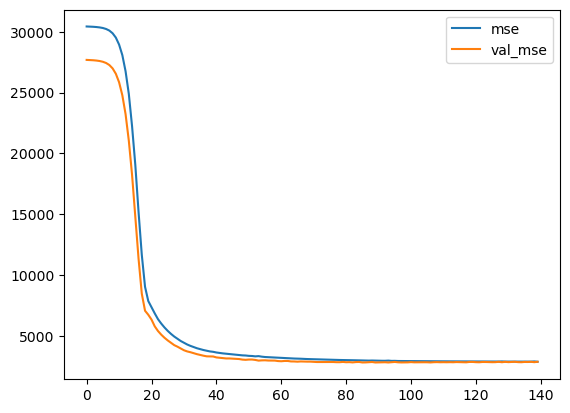

In [8]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse', 'val_mse'])
plt.show()

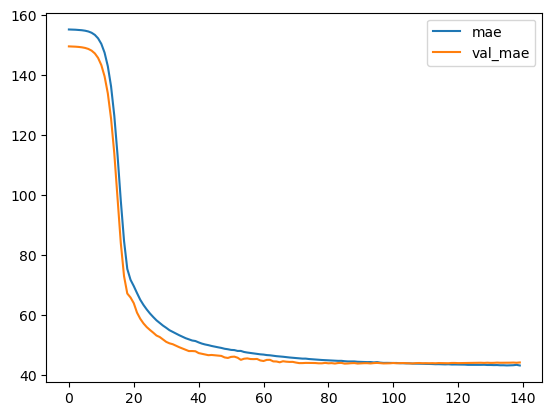

In [9]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.show()

In [10]:
scores = model.evaluate(X_train, y_train)
print(scores)

12/12 [==============================] - 0s 1ms/step - loss: 2864.3965 - mse: 2864.3965 - mae: 43.2717
[2864.396484375, 2864.396484375, 43.27170944213867]


In [11]:
scores = model.evaluate(X_test, y_test)
print(scores)

3/3 [==============================] - 0s 2ms/step - loss: 3011.1360 - mse: 3011.1360 - mae: 42.9514
[3011.135986328125, 3011.135986328125, 42.951412200927734]


In [16]:
from sklearn.metrics import r2_score
pred=model.predict(X_test)
r2_score(y_test, pred)

3/3 [==============================] - 0s 1ms/step


ValueError: Found input variables with inconsistent numbers of samples: [89, 3]